<h1 align="center"><font size="5">AUTOENCODERS</font></h1>

<img src="https://miro.medium.com/max/1400/0*ajC4vL-08h5xp3G7.png" width="400px" align="center">

* Get to know Deep Learning and PyTorch framework
* Learn how to compress images using AutoEncoders
* Understand the differences between JPEG compression and deep learning-based compression
* Know how to read and use code given by someone else

**Disclaimer**

We will refer to :
- AutoEncoder as AE
- Multi Layer Perceptron as MLP

Please make sure that your environment has a GPU. For that, go to: 
* Execution
* Modifier le type d'execution
* Accelerateur matériel: GPU

We advice you to keep in an Excel Sheet or somewhere else the important values, for different parameters, that you will compute during this lab (accuracies, losses...)


# 0 - Introduction

We have seen JPEG compression, a general algorithm that can compress any image. Let's first see your understanding of the JPEG algorithm :
* What are the component in the encoding part of the algorithm ?

L'encodage au format JPEG se fait en plusieurs étapes :    
- Le passage au format de couleur YCrCb
- Le sous échantillonage des chrominances (Cr et Cb)
- Le découpage en blocs de pixels
- Le centrage des valeurs puis application de la DCT
- La quantification
- Le codage RLE suivie du codage de Huffman

* What are the component in the decoding part of the algorithm ?

Le décodage du format JPEG se fait en plusieurs étapes :

- Le décodage Huffman suivie du décodage RLE
- La dé-quantification
- La DCT inverse puis le dé-centrage des valeurs
- Le ré-assemblage des blocs de pixels
- Le sur-échantillonage des chrominances (Cr et Cb)
- Le passage au format de couleur initiale de l'image


* Is the down-sampling phase of JPEG linear ? (i.e : in a y = ax+b form)

La phase de sous-échantillonnage de JPEG... 


* Is it a lossless compression algorithm ?

Oui, la compression JPEG est une compression avec perte, notamment au moment du sous-échantillonage des chrominances mais également au moment de la quantification (puisqu'on prend les parties entières des valeurs quantifiées).

## b - Reading the documents 

**Very important: take 20-25 minutes to read the following documentation to understand the basic.**

### i - What is deep learning ?

Deep Learning is a branch of AI where you **teach a Model** a certain **task** using a **Dataset**. The model or a neural network is built by multiple consecutive **layers** of neuron-like units, remotely based on neurons in the human brain. Typically, many consecutive layers are used, that is why it is referred to as deep learning. In those layers, each neuron has several **parameters** (**weights**) that are updated during **training** by minimizing a **loss** (error) function, using **Stochastic Gradient Descent**. Besides the model parameters, to be found using a dataset, there are also **hyperparameters** that you have to tune by yourself, for example, how many layers used in your model, how many neurons per layer,.... The Model infers a prediction from an **input**. In fact, a Deep Neural Network can be seen as a complex function ${f}$ that maps the input data to a learned space from the Dataset. 

Note the bold words. These are the important things you need to understand about Deep Learning. 

### ii- Generalities on AutoEncoder

<img src = "https://blog.keras.io/img/ae/autoencoder_schema.jpg">

"Autoencoding" is a data compression algorithm where the compression and decompression functions are 1) **data-specific**, 2) **lossy**, and 3) **learned** automatically from examples rather than engineered by a human. In almost all contexts where the term "autoencoder" is used, the compression and decompression functions are implemented with neural networks.

1) Autoencoders are data-specific, which means that they will only be able to compress data similar to what they have been trained on. 

2) Autoencoders are lossy.

3) Autoencoders are learned automatically from data examples.

To build an autoencoder, you need three things: an encoding function, a decoding function, and a distance function between the amount of information loss between the compressed representation of your data and the decompressed representation. In fact, we can look at the model as a big function :

* Encoder : This part compresses the input image to a compressed version of it, where $f(x)= z$, where $x$ is the input image, and $z$ the compressed representation of it.
* Decoder : This part of the model decompresses the compressed representation $z$ to the decompressed image $\tilde{x}$, in other terms we have a function $g$ where, $\tilde{x} = g(z)$
* AutoEncoder : by stacking the Encoder and the Decoder, and as we want $\tilde{x} = x$ (a.k.a the reconstructed image as similar as the input image), we can rewrite the AE as $\tilde{x} = g(z) = g\circ f(x)=  x$ where $g= f^{-1}$

### iii - Layers

A Layer is an important part of a model. In fact, it is the key element of a DL model. A Layer is a structure that takes information from one layer to pass them to the next layer. In a DL network, each layer extracts some kinds of features.

### iv -  Activation functions

An (non-linear) activation function decides the output of a neuron. It is the equivalent of the excitation threshold for which a neuron reacts or not.

**Hints: as activation function in hidden layers, ReLU is often used while sigmoid is not used, due to their properties, notably the calcul complexity of their gradient used for the backpropagation.**

<img src = "https://miro.medium.com/max/1200/1*ZafDv3VUm60Eh10OeJu1vw.png" height = 200>

## Dataset

<img src="https://labelyourdata.com/img/article-illustrations/splitting_data.png" height=200>


When training  a DL model, we use a Dataset. The model uses the data to learn something for a task. We usually divide the data into Training, Validation, Test sets.
- Training set is used to train the Model (i.e., to find the parameters of Model).
- Validation set is used to watch the Model's training (to verify whether the training procedure goes well).
- Test set is used to evaluate the performance of the Model (in our case, to measure if the model compresses and decompresses well new images).

<img src="https://i.imgflip.com/653bu2.jpg" height=400>

**In our case of AE, we do not need the label of image. Our method is an unsupervised algorithm.**

# 1 - Importing Modules 

> Do not reinvent the wheel !

Hi there, we are a Big Company and we need your help as a data scientist. We have some images to compress. We tried the JPEG algorithm but we also want to try some modern methods based on deep learning (DL). 


In [ ]:
# visualisation
%matplotlib inline
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow
from cv2 import imshow

# ndarray with numpy
import numpy as np

# usual python module
import random

# torch
import torch
import torch.nn.functional as F
from torch import nn
from torch.utils.data import DataLoader, random_split

# torchvision
import torchvision
import torchvision.transforms as transform
from torchvision.datasets import MNIST, CIFAR10
from torchvision import transforms

# image processing lib
import skimage
import cv2
from skimage import io

One can check if there is one or more Nvidia GPUs with `torch.cuda.is_available()` 

If it returns True, it means pytorch can leverage an Nvidia card.

We then create a `torch.device` that we will use later

https://pytorch.org/docs/stable/tensor_attributes.html#torch.torch.device

In [ ]:
print('torch.cuda.is_available()', torch.cuda.is_available())

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device is :', DEVICE)

torch.cuda.is_available() True
device is : cuda


All pytorch tensor will by default be created on the `'cpu'` device.

In [ ]:
foo = torch.zeros((32, 32, 3))

print("foo's type   :", type(foo))
print("foo's dtype  :", foo.dtype)
print("foo's size   :", foo.size())
print("foo's shape  :", foo.shape)
print("foo's device :", foo.device)

foo's type   : <class 'torch.Tensor'>
foo's dtype  : torch.float32
foo's size   : torch.Size([32, 32, 3])
foo's shape  : torch.Size([32, 32, 3])
foo's device : cpu


If you want to leverage GPU acceleration (you should !), 

1) You can either directly create a Tensor on the GPU by passing the device parameters. Most of Torch function can accept this `device` parameter.

In [ ]:
foo_gpu = torch.zeros((32, 32, 3), device=DEVICE)

print("foo_gpu's type   :", type(foo_gpu))
print("foo_gpu's dtype  :", foo_gpu.dtype)
print("foo_gpu's size   :", foo_gpu.size())
print("foo_gpu's shape  :", foo_gpu.shape)
print("foo_gpu's device :", foo_gpu.device)

foo_gpu's type   : <class 'torch.Tensor'>
foo_gpu's dtype  : torch.float32
foo_gpu's size   : torch.Size([32, 32, 3])
foo_gpu's shape  : torch.Size([32, 32, 3])
foo_gpu's device : cuda:0


2) Or you can send a cpu Tensor to the a specific GPU by using `torch.Tensor` `to` method.

https://pytorch.org/docs/stable/generated/torch.Tensor.to.html

In [ ]:
foo_to_device = foo.to(DEVICE)

print("foo_to_device's type   :", type(foo_to_device))
print("foo_to_device's dtype  :", foo_to_device.dtype)
print("foo_to_device's size   :", foo_to_device.size())
print("foo_to_device's shape  :", foo_to_device.shape)
print("foo_to_device's device :", foo_to_device.device)

foo_to_device's type   : <class 'torch.Tensor'>
foo_to_device's dtype  : torch.float32
foo_to_device's size   : torch.Size([32, 32, 3])
foo_to_device's shape  : torch.Size([32, 32, 3])
foo_to_device's device : cuda:0


# 2 - Dataset: MNIST

http://yann.lecun.com/exdb/mnist/

In [ ]:
from IPython.display import Image
Image(url='https://media.giphy.com/media/nF0WqRkUiV1aC5RY8v/giphy.gif')

Torchvision provides many built-in datasets in the torchvision.datasets module, as well as utility classes for building your own datasets.

We will use Torchvision's MNIST dataset

https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST

**We start by creating a `train` split of MNIST**

In [ ]:
# TODO: Load MNIST Train Dataset from TorchVision

train = True # bool (False/True)

dataset = MNIST('', train=train, download=True, transform=transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 86972471.03it/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 85067200.72it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 24886527.73it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14059430.83it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



TODO: What's the size (length) of the Dataset ?

hint : `dataset` is a (python) iterable 

https://www.pythonlikeyoumeanit.com/Module2_EssentialsOfPython/Iterables.html

In [ ]:
print(len(dataset)) # use len() function

60000


TODO: Retrieve one element of index `i` (an integer value of your choice)


In [ ]:
sample = dataset[0] #

print('sample type :', type(sample))
print('sample len :', len(sample))

sample type : <class 'tuple'>
sample len : 2


Here you have a function `show` that allows you to plot one or a list of image.


In [ ]:
# Nothing to do, just run this
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = torchvision.transforms.functional.to_pil_image(img)
        cmap = 'Greys' if img.mode == 'L' else None
        axs[0, i].imshow(np.asarray(img), cmap=cmap)
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
        axs[0, i].set_axis_off()
    fig.tight_layout()
    

Let's see what's inside one sample : image and target ! 

https://www.w3schools.com/python/python_tuples_unpack.asp


In [ ]:
index = 3 # to modify
sample = dataset[index] 

# using python 'unpacking' mechanism 
image, target = sample
# or using iterable's indexing mechanism
image, target = sample[0], sample[1]

print('target :', target)
print('target type :', type(target))

print('image type :', type(image))
print('image shape :', image.shape)

target : 1
target type : <class 'int'>
image type : <class 'torch.Tensor'>
image shape : torch.Size([1, 28, 28])


Let's now plot an image using the provided function

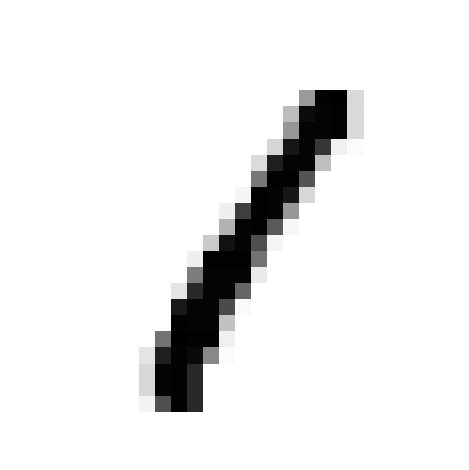

In [ ]:
show(image) # 'image' or 'target' in the last cell

Let's get fancy and plot a grid of size `nrow`x`nrow` of randomly selected image from the dataset

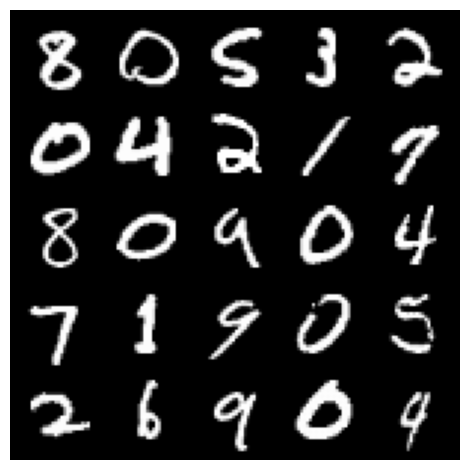

In [ ]:
nrow = 5

# create nrow*nrow random indexs from the dataset
indexs = random.sample(range(len(dataset)), nrow*nrow)

# retrieves their corresponding sample  
samples = [dataset[index] for index in indexs]
# and their image
images = [image for (image, target) in samples]

# create a grid and plot it
grid = torchvision.utils.make_grid(images, nrow=nrow)
show( grid )

**The second one: the test dataset**

As you can see in the above code, there's a "train" attribute of the MNIST class. When it is set to True, you are loading the training dataset. Therefore, in the following code, change it to false to load the test dataset.

In [ ]:
# TODO : Load the test dataset. Inspire yourself from the mnist_train dataset loading

mnist_test = MNIST('', train=False, download=True, transform=transforms.ToTensor())

Let's verify that the data in the test dataset are in the same style of the train Dataset :    
- Plot few data from the test dataset with its label.
- Are the data similar? Are the labels similar? cf Compte-Rendu

60000
torch.Size([1, 28, 28])
10000
torch.Size([1, 28, 28])


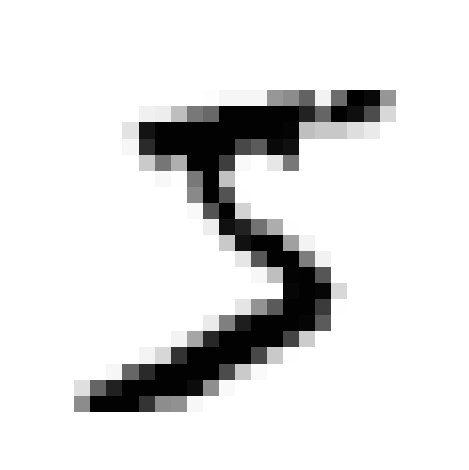

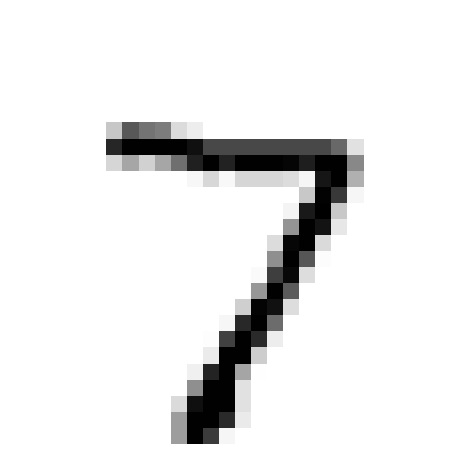

In [ ]:
# TODO: What's the size of the Dataset ?
# TODO: Retrieve one element of the Dataset ? What is the shape of one piece of Data ? 
# TODO: Plot the retrieved Data

size_of_dataset = len(dataset)
print(size_of_dataset)
data = dataset[0]
print(data[0].shape)

show(data[0])

size_of_mnist_test = len(mnist_test)
print(size_of_mnist_test)
data_test = mnist_test[0]
print(data_test[0].shape)

show(data_test[0])



**The third one: creating the Validation dataset**

Besides the training and testing sets, we would have a validation set. The validation set allows us to follow the training of model or in other words verify whether the training procedure goes well or not. 

In the next codes,
- What do 55000 and 5000 mean ? cf Compte-rendu
- Determine the split value of the training set to create the validation dataset

In [ ]:
# Questions : what does 55000 and 5000 mean ? Hint: look at the Dataset length and determine the split value
mnist_train, mnist_val = random_split(dataset, [55000, 5000])
print(len(mnist_val), len(mnist_train))

5000 55000


**Creating the Dataloaders**

The dataset returns one element or item at a time. In DL, we prefer sending many items at the same time to the model. We form BATCH of Data using a DataLoader. Dataloader is an iterable over the dataset. It means that the Dataloader will form batches of Data for you and fetch them when you loop through it.

- Create a DataLoader for your Training, Validation and Test Dataset

More information on dataloader : https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader

In [ ]:
train_loader = DataLoader(mnist_train, batch_size=128, drop_last = True)
val_loader = DataLoader(mnist_val, batch_size=128, drop_last = True)
test_loader = DataLoader(mnist_test, batch_size=128, drop_last = True)

# 3 - Model: AutoEncoder 

> Creating and training the AE model 

We saw what the data was and created our datasets. We need now to fullfil our mission and we need a model.

<img src="https://i.imgflip.com/640uob.jpg" height=300>

We are going to explore the path of AutoEncoder! Let's write some readable codes. Our code must be modulable and easy to read. We should try two types of AutoEncoders :    
- MLP Style
- Conv Style


Use PyTorch and Create Modulable and Stackable Models that inherits from nn.Module.




## a - MLP Style : Exploring the Neurons

<img src='https://www.researchgate.net/publication/344394387/figure/fig1/AS:974657746399232@1609387923440/Figure-Computational-Schematics-of-the-MLP-and-the-autoencoder.png'>

We will first try a MLP AE.




#### Creating a Model in PyTorch

Creating a model in PyTorch is simple. A PyTorch is an object that inherits from nn.Module. The pseudo-code is the following :     

```python
class Model(nn.Module):
  def __init__(self,...):
    """"
    Define the model. You can put the input size as a parameter if needed..
    """"
    super().__init__() # to init the main class
    self.layers = ... # defining the model : could be Conv2d, Linear, RNN, LSTM


  def forward(self,x):
    """
    The input x is forwarded through the neural net. 
    """
    output = self.layers(x)
    return output

  # Other methods go down
```

More informations : https://pytorch.org/docs/stable/nn.html


### i - Correcting the Mistakes

First, we will try a really simple model :
* an Input Dense layer
* a latent space
* an Output Dense layer


We have received some codes from the other members of the Deep Learning Engineering Team. There are lots of mistakes... Let's correct them.

In [ ]:
# TODO: Correct the following class. 
# Hint: Look at the input, output size, the activations, how the data is forwarded ...
# Hint: for activations, look at their above hints
# We have in this lab a variable called 'compressed_space_size' but it is actually 'latent space size' usually used in auto-encoder

class AutoEncoder_MLP(nn.Module):
  def __init__(self, input_size, compressed_space_size):
    """
    The model is an Input Layer, a Hidden Layer and an Output layer 
    """
    super().__init__() 
    # TODO : Init the class attributes thanks to the arguments of the init methods
    self.input_size = input_size
    self.output_size = input_size
    self.compressed_space_size = compressed_space_size
    # TODO : Correct 3 mistakes from the model
    self.input = nn.Sequential(nn.Linear(self.input_size, self.compressed_space_size),
                               nn.Sigmoid()) # Hint: mistake this line
    self.output = nn.Sequential(nn.Linear(self.compressed_space_size, self.output_size), # Hint: mistake this line
                               nn.Sigmoid()) 
    # end TODO: in total, there are 6 mistakes in all these 5 above lines

  def forward(self,x):
    """
    The input x is forwarded through the neural net. 
    """
    # TODO 
    compressed_image = self.input(x)
    decompressed_image = self.output(compressed_image)
    return decompressed_image

In [ ]:
# TODO : Create an Instance of the Model by calling the Class with the correct values

model = AutoEncoder_MLP(784, 512)

# TODO : Print the model.
print(model)

AutoEncoder_MLP(
  (input): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Sigmoid()
  )
  (output): Sequential(
    (0): Linear(in_features=512, out_features=784, bias=True)
    (1): Sigmoid()
  )
)


## b - Training

We can train the model. We have a Model and a Dataset. We need few more things..



### i - Loss function

The loss function must tell us how far our predictions are from the true labels. 
This could be done by comparing the distributions of two input data, or by directly comparing the data using some distance metrics.

We are reconstructing an image from its compressed version and we want the reconstructed image as similar as possible to the original image. i.e $\tilde{x} = x$

<img src="https://i.imgflip.com/6946oe.jpg" height=400>



- How can you calculate the similarity between two vectors?
- What type(s) of loss function do you know that calculates the **distance** between two inputs?

More information: https://pytorch.org/docs/stable/nn.html#loss-functions

In [ ]:
# TODO : Delete the uncorrect loss 
criterion = nn.MSELoss()

### ii - An Optimizer

<img src="https://i.imgflip.com/640sfs.jpg" height= 400>

We need to gradually update the weights of the model. In fact, we perform the **gradient descent** to recalculate the weights of each layer regarding the model's predictions. The optimizer will search for an Optimum. It needs a step to perform this research. This step is called the **learning rate**. The learning rate has an important effect on the learning phase (duration, convergence,...).
Think of the **gradient descent** as you trying to answer an exercise : the first time you won't understand, the second time you'll suceed more, and so on...

<img src=https://miro.medium.com/max/918/0*uIa_Dz3czXO5iWyI. height =300>

In this case, we will use Adam Optimizer (it is efficient). Don't hesitate to have a look at the other optimizers. 

More information: https://pytorch.org/docs/stable/optim.html

In [ ]:
# TODO : define a small learning rate
learning_rate =  0.0001
# TODO : load the Adam optimizer in the optimizer variable
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


### iii - Training

Please use GPU to accelerate this phase.

Training a model consists of the following loop :
* Sending Data through the model to obtain Predictions
* Computing the Loss 
* Backwarding the Loss using Gradients 
* Logging the losses and accuracies (if exists) (Optional)

The number of epochs is a hyperparameter that defines the number of time the learning algorithm will work through the entire training dataset.



* Create your training and validation loop to train your model.

In [ ]:
# Pre Defined and Useful variables
mini_batches_print = 10 # To print every 10 mini batches

# TODO: Send the model to the device using .to(device): model.to(device)
# https://pytorch.org/docs/stable/generated/torch.Tensor.to.html
net = model.to(DEVICE)
device = DEVICE
# TODO : Define your number of epochs

num_epochs = 15

In [ ]:
loss_train , loss_val = [], []
for epoch in range(num_epochs) : 
    running_loss_t,running_loss_v = 0.0, 0.0
    # TODO : Create your Training Loop
    for i, data in enumerate(train_loader, 0): 
        # TODO : load the data into two variables
        image, label = data[0], data[1]
        
        # TODO : reshape the input image using .view().to(device) so that it fits the input layers neuron numbers.
        # Don't forget the Batch Size, the 1st dimension must always be the Batch Size
        image_reshaped, label = data[0].view(data[0].shape[0],-1).to(DEVICE), data[1]
        if i==0 :
          print(image_reshaped.shape)
        optimizer.zero_grad()

        # TODO : send the reshaped image to the model
        outputs = net(image_reshaped)

        # TODO/Questions : Do we need to reshape the input image ? If yes, reshape the image
        outputs = outputs.reshape([128, 1, 28, 28], -1).to(DEVICE)

        # TODO : Compute the loss between 'outputs' (the reconstructed images) and original 'image'
        # Don't forget to send the image to the device
        loss = criterion(outputs ,image.to(device))

        loss.backward()
        optimizer.step()
        running_loss_t += loss.item()
        if i == mini_batches_print :
          running_loss_t= running_loss_t/mini_batches_print  
          print('training loss is :',running_loss_t)
          loss_train.append(running_loss_t)  

    # TODO : Create your Validation Loop
    with torch.no_grad():
      for i, data in enumerate(val_loader, 0):    
        # TODO : Do the same as the Train loop but delete everything related to weight update (optimizer, loss backwards ...)
        image, label = data[0].view(data[0].shape[0],-1).to(device), data[1]
        outputs = net(image) # use net()
        outputs = outputs.view([128, 784], -1).to(DEVICE) # use .view of outputs precedently found 
        loss = criterion(outputs ,image.to(device)) # use criterion()
        #optimizer.zero_grad() # Keep or not ? On ne garde pas car le modèle ne doit pas être modifié sur le validation set
        #loss.backward() # Keep or not ? On ne garde pas car le modèle ne doit pas être modifié sur le validation set

        running_loss_v += loss.item()
        if i == mini_batches_print :
            running_loss_v= running_loss_v/mini_batches_print 
            print('validation loss is :',running_loss_v)
            loss_val.append(running_loss_v)
      

torch.Size([128, 784])
training loss is : 0.23338010609149934
validation loss is : 0.06723706126213073
torch.Size([128, 784])
training loss is : 0.0672544702887535
validation loss is : 0.05065249986946583
torch.Size([128, 784])
training loss is : 0.050559931248426435
validation loss is : 0.041030881181359294
torch.Size([128, 784])
training loss is : 0.04101800099015236
validation loss is : 0.03436659928411245
torch.Size([128, 784])
training loss is : 0.03437142428010702
validation loss is : 0.029176697507500647
torch.Size([128, 784])
training loss is : 0.029125450924038888
validation loss is : 0.0249984348192811
torch.Size([128, 784])
training loss is : 0.024904335290193556
validation loss is : 0.021572162583470344
torch.Size([128, 784])
training loss is : 0.02147102952003479
validation loss is : 0.01872919611632824
torch.Size([128, 784])
training loss is : 0.018638885393738747
validation loss is : 0.016396214812994005
torch.Size([128, 784])
training loss is : 0.0163154698908329
valida

### iv - Did it learn something ?

As you might see, we logged into two lists (train_loss, val_loss) losses computed during training. Let's plot them (do not forget to put titles and axis)
- How can you tell that the training is over?

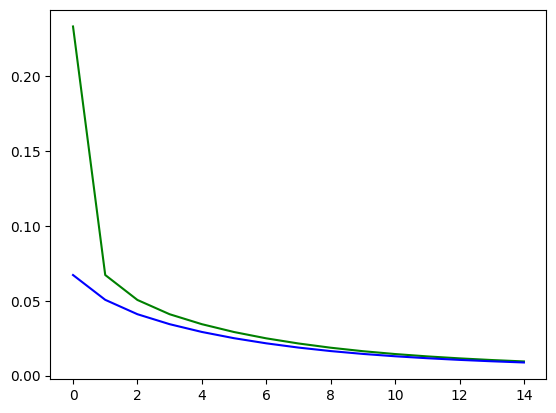

In [ ]:
# TODO : plot the train and val loss on the same graph using matplotlib.pyplot.
# Always put legend on your graphs

plt.plot(loss_train, color='green')
plt.plot(loss_val, color='blue')
plt.show()


## c - Testing the compression

We already trained our model, let's test it on the testing set. We received an email from the senior Data Scientist :


---

 🔊 🔊 🔊 **Message from the Senior Data Scientist** 🔊 🔊 🔊

Hi, this is C. the Senior Data Scientist

I heard that you've trained your model. Let's test it.
Take the test dataloader, iterate through it and send the test data to the model. We need to check how similar to the original image the decompressed image is..
Do not forget to delete all gradient calculation, it takes time and space for nothing. 


---





* Why must we not compute the gradients for the testing step?



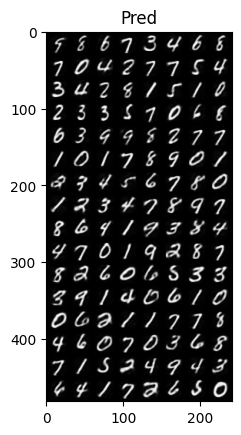

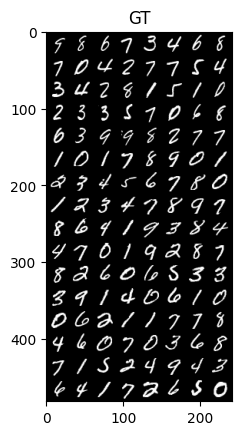

The difference between the Real Images and the Decompressed Images is:  0.604818276129663


In [ ]:
def imshow(img, name= 'GT'):
    npimg = img.cpu().numpy()
    # (channels, width, height) to (width, height, channels)
    npimg = np.transpose(npimg, (1, 2, 0)) 
    plt.imshow(npimg)
    plt.title(name)
    plt.show()

# TODO : form your testing loop. Is it different than the validation loop?
with torch.no_grad():
  losses = 0
  for i, data in enumerate(test_loader, 0):
    image, label = data[0].view(data[0].shape[0],-1).to(device), data[1]
    outputs = net(image.view(128,-1).to(device))
    outputs = outputs.view([128, 1, 28, 28], -1);
    loss = criterion(outputs ,image.to(device).view([128, 1, 28, 28])) # use criterion()
    losses += loss.item() # accumulate 'loss' into 'losses'

# Plot the last batch
imshow(torchvision.utils.make_grid(outputs.detach().cpu()),'Pred')
imshow(torchvision.utils.make_grid(data[0]),'GT')

# TODO : Print the difference in decompression and write it somewhere
print('The difference between the Real Images and the Decompressed Images is: ', losses)    


<img src="https://i.imgflip.com/64elyi.jpg" height=200>

Let's see the effect of the compression: 
* Change the latent_size to different values and compare the compression differences. 

For example, try 512, 128, 16, 1.



training loss is : 0.2125384020805359
training loss is : 0.07181665912270546
training loss is : 0.06879284024238587
training loss is : 0.06564537063241005
training loss is : 0.06120782889425755
training loss is : 0.05647371158003807
training loss is : 0.0521995946764946
training loss is : 0.048468497544527055
training loss is : 0.04525520324707031
training loss is : 0.04241483584046364
training loss is : 0.039780907481908795
training loss is : 0.03729914166033268
training loss is : 0.03499631248414516
training loss is : 0.03286104079335928
training loss is : 0.03090503379702568


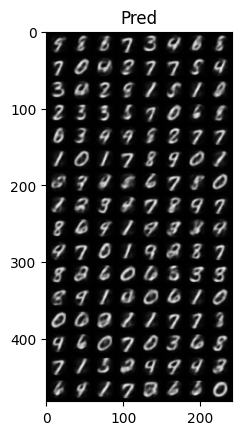

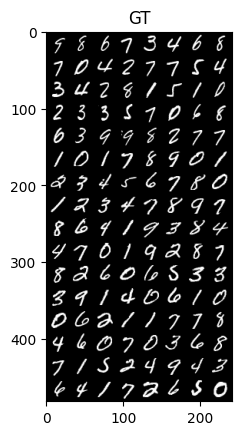

The decompression of the Encoded Test Dataset has an reconstruction error of:  2.2287707906216383


In [ ]:
# TODO : Change your model, Test for differents size of Compressed Space Size. We advice you to try 1, 128, 512
model = AutoEncoder_MLP(28*28,128)

# TODO : Train it. Can we copy paste previous things ?
#device = 'cuda' if torch.cuda.is_available() else 'cpu'
losses = 0
net = model.to(device)
criterion = nn.MSELoss()
learning_rate = 0.0001
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
num_epochs = 15

# TODO 
for epoch in range(num_epochs) : 
    running_loss_t,running_loss_v = 0.0, 0.0
    # Train Loop
    for i, data in enumerate(train_loader, 0): 
      image, label = data[0], data[1]
      image, label = image.view(image.size(0),-1).to(device), data[1]
      optimizer.zero_grad()
      outputs = net(image)
      outputs = outputs.reshape([128, 1, 28, 28], -1).to(device)
      loss = criterion(outputs ,image.to(device).view([128, 1, 28, 28]))
      loss.backward()
      optimizer.step()
      running_loss_t += loss.item()
      if i == 50:
        running_loss_t= running_loss_t/50
        print('training loss is :',running_loss_t)

    # Validation Loop
    with torch.no_grad():
      for i, data in enumerate(val_loader, 0):  
        image, label = data[0].view(data[0].shape[0],-1).to(device), data[1]
        outputs = net(image.view(128,-1).to(device))
        outputs = outputs.view([128, 1, 28, 28], -1);
        loss = criterion(outputs ,image.to(device).view([128, 1, 28, 28]))
        running_loss_v += loss.item()
        if i == 50:
            running_loss_v= running_loss_v/50
            print('validation loss is :',running_loss_v)
            loss_val.append(running_loss_v) # show validation loss

# TODO : Test the Trained Model. Can we copy paste previous stuff ?

with torch.no_grad():
  running_loss = []
  for i, data in enumerate(test_loader, 0):  
    image, label = data[0].view(data[0].shape[0],-1).to(device), data[1]
    outputs = net(image.view(128,-1).to(device))
    outputs = outputs.view([128, 1, 28, 28], -1);
    loss = criterion(outputs ,image.to(device).view([128, 1, 28, 28])) # use criterion()
    losses += loss.item() # accumulate 'loss' into 'losses'

# Plot the last batch
imshow(torchvision.utils.make_grid(outputs.detach().cpu()),'Pred')
imshow(torchvision.utils.make_grid(data[0]),'GT')

# TODO : Print the reconstruction error over the test dataset

print( 'The decompression of the Encoded Test Dataset has an reconstruction error of: ', losses)


## d - Testing on other type of data

We can say that the model works pretty well on the test data. Let's test it on other kind of images.

* Write the code to test the compression on **images** taken from the internet.

/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


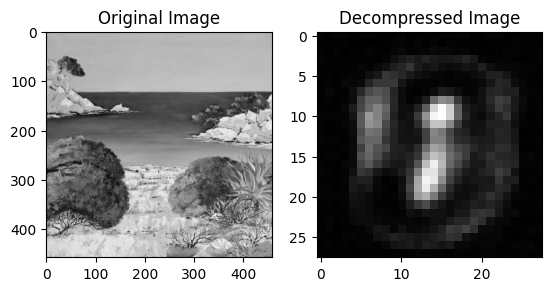

In [ ]:
# TODO : Test some images from the internet to see the compression effect 
image_filename = "https://i.pinimg.com/originals/e1/be/38/e1be381615f6d376e606cddc63bd46ab.jpg" # TODO: give a URL's image 
image_numpy = cv2.cvtColor(skimage.io.imread(image_filename ),cv2.COLOR_BGR2GRAY)
transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Resize((28,28))])

# TODO : Transform the images and add a dimension for the batch size using unsqueeze
image = transform(image_numpy)
#image = transform(image_numpy).unsqueeze(0)

# TODO : Send the model to the model and process the prediction. Don't forget 
# the resizes
pred = model(image.view(image.size(0),-1).to(device))
pred = pred.view([28, 28], -1);


# TODO : Plot dem results'. Don't forget to detach and send to the gpu the data
# using .detach().cpu()

fig, axarr = plt.subplots(1, 2)
axarr[0].imshow(image_numpy, cmap='gray')
axarr[0].set_title('Original Image')
axarr[1].imshow(pred.detach().cpu(), cmap='gray')
axarr[1].set_title('Decompressed Image')
plt.show()


* What can you say ?

# 4 - Write your report

* Sum up all your understanding on this subject in your report.

You should explain:
* The dataset you used for training,
* The tests you did,
* The models you tested,
* The results you had,
* The explanation of the results (why it works, why it doesn't),
* How can we compute the compression rate of the model? 
* Do we need to consider the model's size?

# 5 - Convolutional layer style : seeing a region

<img src="https://miro.medium.com/max/1838/1*LSYNW5m3TN7xRX61BZhoZA.png" height = 300>

---
 🔊 🔊 🔊 **Message from the senior data scientist** 🔊 🔊 🔊

Hello,

Good work! We need now to try another type of model.
Please consider Conv2d layers. 

Here you are some explanations: Convolutional Layers are filters that "scans" the input image in order to extract features. These filters extract features by looking at the region they're on.

I sent you some classes that you should use in your code. 

C.

<img src="https://i.imgflip.com/65b89l.jpg" height=300>

---



**Take 5 minutes to learn more about convolution with the following link:**

* https://ezyang.github.io/convolution-visualizer/

Questions:    
* What is the stride parameter?

Le stride est le pas de déplacement de la matrice filtre. Plus le pas est grand, plus la dimension de la matrice en sortie est faible.

* What is the padding parameter?

Le padding est le nombre de lignes et colonnes de zéros rajoutées fictivement autour de la matrice d'entrée et qui sont pris en compte dans le déplacement de la matrice filtre. Cela augmente la taille de la matrice de sortie.

* What will change on the output when increasing the Kernel Size?

Le kernel = noyau est ce que nous avons appelé précédemment "matrice filtre". Plus sa taille augmente, plus la matrice de sortie est petite.

**Receptive field: are the pixels seen by filter kernel.**


## a - Model definition

Have a look at the model sent by the senior data scientist.

### i - Submodules

#### Conv Down

ConvDown is used to reduce the image size. A convolution on the input image is done using a kernel (the coefficients of kernel are weights to be found). In fact, it is used to extract interesting features of image. Our ConvDown Model will be composed of two layers:     
* Conv2d layer
* Non linearity (ReLU)

<img src="https://www.jeremyjordan.me/content/images/2017/07/no_padding_no_strides.gif">

In [ ]:
class ConvDown(nn.Module):
    """
    This class takes as input the channels and returns a feature map 
    for the given output channel. 
    It indeed applies ReLU to it
    ConvDown stacks a Conv2d layer with an ReLU Activation 

    """
    def __init__(self, input_channel, output_channel, kernel_size = 3):
        super().__init__()
        self.input_channel = input_channel
        self.output_channel = output_channel
        self.kernel_size = kernel_size
        self.model = nn.Sequential(nn.Conv2d(self.input_channel, self.output_channel, kernel_size =self.kernel_size ),
                                    nn.ReLU())
                                    
    def forward(self,x):
        # TODO :  Send the data through the model and return the output
        outputt = self.model(x)
        return outputt

#### Conv Up

ConvUp is used to decompress the input image. In fact, it uses extracted features to reconstruct output feature map.

* Is it possible to increase output size map using Conv2d layers?

We can use also ConvTranpose2D layers, that use **transpose convolution** over an input image. These ConvTranspose layers learn to upsample the input images.

<img src="https://miro.medium.com/max/1400/1*HnxnJDq-IgsSS0q3Lut4xA.gif" height=200>

In [ ]:
class ConvUp(nn.Module):
    """
    ConvUp stacks a Conv2d layer with an Activation 
    If output is True : the Activation is Sigmoid
    If output is False : the Activation is ReLU
    """
    def __init__(self, input_channel, output_channel, kernel_size = 3 , output = True):
        super().__init__()
        self.input_channel = input_channel
        self.output_channel = output_channel
        self.kernel_size = kernel_size
        self.output = output
        self.model = nn.Sequential(nn.ConvTranspose2d(self.input_channel, self.output_channel, kernel_size =self.kernel_size ),
                                    nn.ReLU()) if output is False else nn.Sequential(nn.ConvTranspose2d(self.input_channel, self.output_channel, kernel_size =self.kernel_size ),
                                    nn.Sigmoid())
        
    def forward(self,x):        
      # TODO :  Send the data through the model and return the output
      outputt = self.model(x)
      return outputt

### ii - Modules : the wrappers

#### Encoder

The encoder stacks multiple ConvDown to compress and extract features.

<img src="https://i.imgflip.com/65bqe0.jpg" height=300>

In [ ]:
class Encoder(nn.Module):
    """
    The encoder stacks multiple ConvDown to compress and extract features
    For the moment, we just keep one ConvDown layer

    """
    def __init__(self,input_channel, output_channel, kernel_size = 3):
        super().__init__()
        self.input_channel = input_channel
        self.output_channel = output_channel
        self.kernel_size = kernel_size
        self.model = nn.Sequential( ConvDown(self.input_channel, self.output_channel,self.kernel_size))
                    
    def forward(self,x):
      # TODO :  Send the data through the model and return the output
      outputt = self.model(x)
      return outputt

#### Decoder

The decoder stacks multiple ConvUp to decompress and upsamples the input.

<img src="https://i.imgflip.com/65br5o.jpg" height=300>

In [ ]:
# TODO : Find the error in the initialization and correct it
class Decoder(nn.Module):
    """
    The Decoder stacks multiple ConvUp to upsample and reconstruct from the input
    another feature map
    For the moment, we just keep one ConvDown layer
    NEEDS TO BE CORRECTED

    """
    def __init__(self,input_channel, output_channel, kernel_size = 3, output = True):
        super().__init__()
        self.input_channel = input_channel
        self.output_channel = output_channel
        self.kernel_size = kernel_size
        self.output = output
        self.model = nn.Sequential( ConvUp(self.input_channel,self.output_channel,self.kernel_size, output))
        
    def forward(self,x):
        # TODO :  Send the data through the model and return the output
        outputt = self.model(x)
        return outputt

### iii - The Conv AutoEncoder: final model 

We stack encoder and decoder in order to form the autoencoder.


In [ ]:
# TODO : Stack the Encoder and the Decoder to Create the AE
# TODO : Initialize the class attributes
# TODO : In the forward method, send the input x through the layers. 
# Be careful to respect the init attributes of the called class

class AutoEncoder_Conv(nn.Module):

    def __init__(self,input_size,latent_size, output= True):
        super().__init__()
        self.input_size = input_size
        self.latent_size = latent_size
        self.output = output
        self.model_encoder = nn.Sequential(Encoder(self.input_size, self.latent_size, kernel_size=3))
        self.model_decoder = nn.Sequential(Decoder(self.latent_size, self.input_size, kernel_size=3, output=self.output))

    def forward(self,x):
        outputt = self.model_decoder(self.model_encoder(x))
        return  outputt


## b - Training and Testing

We can reuse the previously written code. However, we need to make some changes...


* What changes must we do?
* After making these changes, train your model for a latent size of 128.
* Test your model.

training loss is :  0.27259383738040927
training loss is :  0.25119569212198256
training loss is :  0.22065091699361802
training loss is :  0.18546024292707444
training loss is :  0.1523378935456276
training loss is :  0.12445491030812264
training loss is :  0.10303264379501342
training loss is :  0.08734447807073593
training loss is :  0.07585950389504433
training loss is :  0.06739897310733794
training loss is :  0.06106429137289524
training loss is :  0.05620510004460812
training loss is :  0.05236545316874981
training loss is :  0.04924180902540684
training loss is :  0.046598139852285385


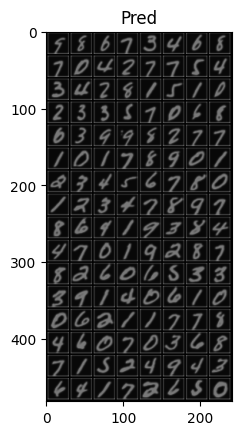

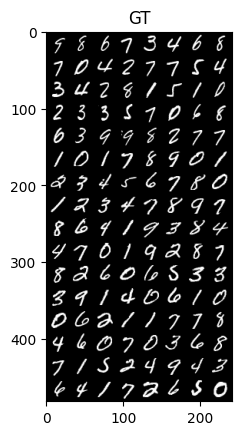

The difference between the Real Images and the Decompressed Images is:  3.4366229362785816


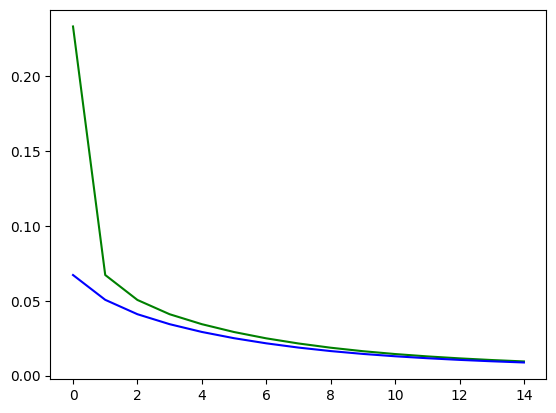

In [ ]:
# TODO : Change your model 
model = AutoEncoder_Conv(input_size=1, latent_size=1, output=True)

# Nous avons considéré que la latent_size est l'épaisseur de l'image compressée.

# TODO : Reload your HyperParameters

losses = 0
net = model.to(device)
criterion = nn.MSELoss()
learning_rate = 0.0001
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
num_epochs = 15

# TODO : Rewrite your Training and Validation Loop
for epoch in range(num_epochs) : 
    running_loss_t,running_loss_v = 0.0, 0.0
    # Train Loop
    for i, data in enumerate(train_loader, 0):
      image, label = data[0].to(device), data[1]
      optimizer.zero_grad()
      outputs = net(image).to(device)
      loss = criterion(outputs, image)
      loss.backward()
      optimizer.step()
      running_loss_t += loss.item()
      if i == 50 :
        running_loss_t = running_loss_t/50
        print('training loss is : ', running_loss_t)



    # Validation Loop
    with torch.no_grad(): # Désactive le calcul de gradient pour la phase du validation set
      for i, data in enumerate(val_loader, 0):
        image, label = data[0].to(device), data[1]
        outputs = net(image).to(device)
        loss = criterion( outputs, image.to(device))
        running_loss_v += loss.item()
        if i == 50 :
          running_loss_v = running_loss_v/50
          print('validation loss is : ', running_loss_v)
          loss_val.append(running_loss_v)


# Testing Loop
with torch.no_grad():
  running_loss = []
  for i, data in enumerate(test_loader, 0):  
    image, label = data[0].to(device), data[1]
    outputs = net(image).to(device)
    loss = criterion(outputs, image.to(device))
    losses += loss.item()


# TODO :  Plot the last batch and the Reconstruction Errors
imshow(torchvision.utils.make_grid(outputs.detach().cpu()), 'Pred')
imshow(torchvision.utils.make_grid(data[0]), 'GT')

print('The difference between the Real Images and the Decompressed Images is: ', losses)

plt.plot(loss_train, color='green')
plt.plot(loss_val, color='blue')
plt.show()

Let's compare the results with different sizes (512, 128, 16, 1):
* What are the reconstruction values on the test set? 
* What is the training time?
* Which model would you advice? 

## c - Deeper Models

All the models we've created are only composed of 3 layers (not really deep): 

      input layer => hidden layer => output layer

We can obviously stack more layers :    
* Modify the Convolutional Encoder and the Decoder so that the AE becomes :     
      input layer => hidden layer => hidden layer => hidden layer => output layer


We want the first and last hidden layer to have the same size

In [ ]:
# TODO : Modify the Encoder and the Decoder by adding one additional hidden layer. The size of the additionnal hidden layer can be greater than the previous one

class Encoder(nn.Module):
    """
    Conv Encoder Class
    """
    def __init__(self,input_channel, output_channel, kernel_size = 3):
        super().__init__()
        self.input_channel = input_channel
        self.output_channel = output_channel
        self.kernel_size = kernel_size
        self.model = nn.Sequential(ConvDown(self.input_channel, 128, self.kernel_size),
                                   ConvDown(128, self.output_channel, self.kernel_size))

    def forward(self,x):
        # TODO :  Send the data through the model and return the output
        output = self.model(x)
        return output
 
class Decoder(nn.Module):
    """
    Conv Decoder Class
    Be careful with the output attribute 
    """
    def __init__(self,input_channel, output_channel, kernel_size = 3, output = True):
        super().__init__()
        self.input_channel = input_channel
        self.output_channel = output_channel
        self.kernel_size = kernel_size
        self.output = output
        self.model= nn.Sequential(ConvUp(self.input_channel, 128, self.kernel_size),
                                  ConvUp(128, self.output_channel, self.kernel_size))
                    
    def forward(self,x):
        # TODO :  Send the data through the model and return the output
        output = self.model(x)
        return output



# TODO : Recreate the AutoEncoder using the Encoder and Decoder 
class AutoEncoder_Conv(nn.Module):

    def __init__(self,input_size,latent_size, output= True):
        super().__init__()
        self.input_size = input_size
        self.latent_size = latent_size
        self.output = output
        self.model_encoder = nn.Sequential(Encoder(self.input_size, self.latent_size, kernel_size=3))
        self.model_decoder = nn.Sequential(Decoder(self.latent_size, self.input_size, kernel_size=3))

    def forward(self,x):
        # TODO :  Send the data through the model and return the output
        output = self.model_decoder(self.model_encoder(x))
        return  output



# TODO : Print the new model
print(AutoEncoder_Conv(input_size= 1,
                       latent_size= 128))


AutoEncoder_Conv(
  (model_encoder): Sequential(
    (0): Encoder(
      (model): Sequential(
        (0): ConvDown(
          (model): Sequential(
            (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1))
            (1): ReLU()
          )
        )
        (1): ConvDown(
          (model): Sequential(
            (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
            (1): ReLU()
          )
        )
      )
    )
  )
  (model_decoder): Sequential(
    (0): Decoder(
      (model): Sequential(
        (0): ConvUp(
          (model): Sequential(
            (0): ConvTranspose2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
            (1): Sigmoid()
          )
        )
        (1): ConvUp(
          (model): Sequential(
            (0): ConvTranspose2d(128, 1, kernel_size=(3, 3), stride=(1, 1))
            (1): Sigmoid()
          )
        )
      )
    )
  )
)


Retrain your Model for a Compressed Space of :       
* 128 
* 64 

Compare the results

training loss is :  0.17271167248487473
training loss is :  0.001631454189773649
training loss is :  0.0006252310110721737
training loss is :  0.00044356229074764996
training loss is :  0.0003462564339861274
training loss is :  0.0002752215150394477
training loss is :  0.00022539679252076895
training loss is :  0.00017003070359351114
training loss is :  0.00013923804537625982
training loss is :  0.00012011448663542978
training loss is :  0.0001059901351982262
training loss is :  9.307200423791073e-05
training loss is :  8.37313785450533e-05
training loss is :  7.672803214518353e-05
training loss is :  7.143345217627939e-05


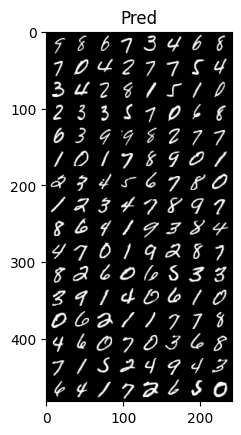

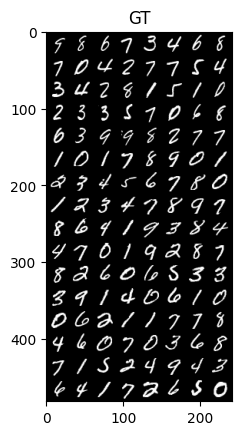

The difference between the Real Images and the Decompressed Images is:  0.0049222530105907936


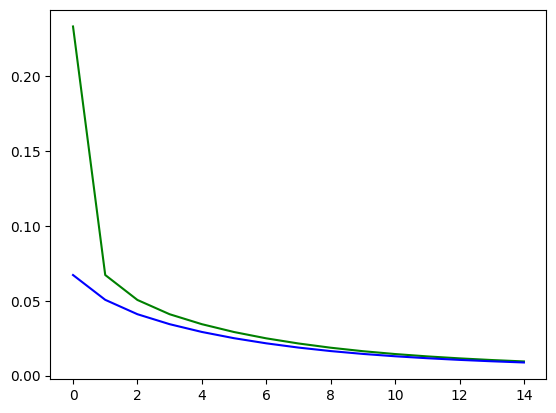

In [ ]:
# TODO : Change your model 
model = AutoEncoder_Conv(input_size=1, latent_size=128, output=True)

# TODO : Reload your HyperParameters

losses = 0
net = model.to(device)
criterion = nn.MSELoss()
learning_rate = 0.0001
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
num_epochs = 15

# TODO : Rewrite your Training  and Validation Loop
for epoch in range(num_epochs) : 
    running_loss_t,running_loss_v = 0.0, 0.0

    # Train Loop
    for i, data in enumerate(train_loader, 0):
      image, label = data[0].to(device), data[1]
      optimizer.zero_grad()
      outputs = net(image).to(device)
      loss = criterion(outputs, image)
      loss.backward()
      optimizer.step()
      running_loss_t += loss.item()
      if i == 50 :
        running_loss_t = running_loss_t/50
        print('training loss is : ', running_loss_t)

    # Validation Loop
    with torch.no_grad():
      for i, data in enumerate(val_loader, 0):
        image, label = data[0].to(device), data[1]
        outputs = net(image).to(device)
        loss = criterion( outputs, image.to(device))
        running_loss_v += loss.item()
        if i == 50 :
          running_loss_v = running_loss_v/50
          print('validation loss is : ', running_loss_v)
          loss_val.append(running_loss_v)

# TODO : Rewrite your Testing Loop
with torch.no_grad():
  running_loss = []
  for i, data in enumerate(test_loader, 0):  
    image, label = data[0].to(device), data[1]
    outputs = net(image).to(device)
    loss = criterion(outputs, image.to(device))
    losses += loss.item() 

# TODO :  Plot the last batch and the Reconstruction Errors
imshow(torchvision.utils.make_grid(outputs.detach().cpu()), 'Pred')
imshow(torchvision.utils.make_grid(data[0]), 'GT')

print('The difference between the Real Images and the Decompressed Images is: ', losses)

plt.plot(loss_train, color='green')
plt.plot(loss_val, color='blue')
plt.show()

# 6 - Where's that noise?

AE can be used to denoise image. It means that if there are some noise in the input image, the AE will be able to reconstruct the image without noise.

<img src="https://miro.medium.com/max/1400/1*z7SUcHkWp7jT1D_SqvTvgA.png" height=300>


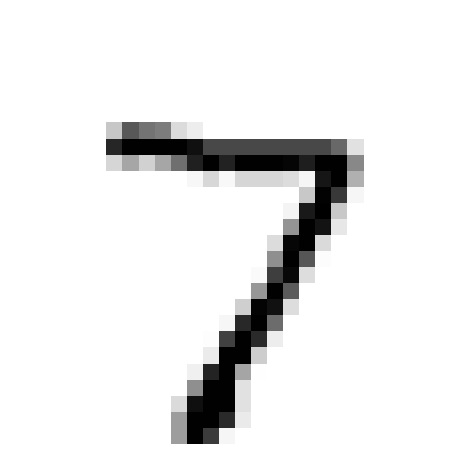

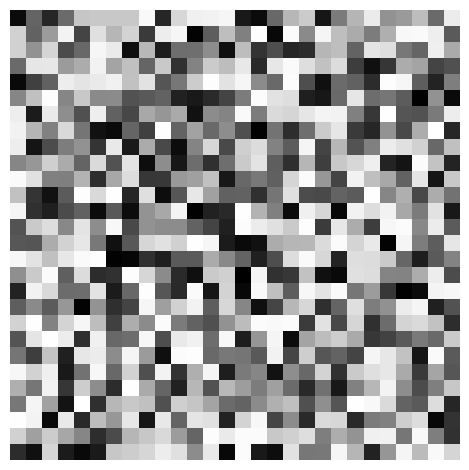

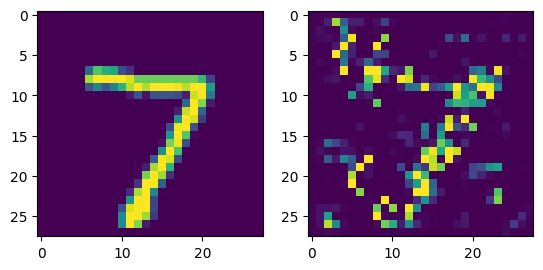

In [ ]:
# TODO : Using torch.randn_like, create some noise and return a noisy input
# Lien pour Margot : https://pytorch.org/docs/stable/generated/torch.randn_like.html

def add_noise(inputs, noise_factor):
     noise = torch.randn_like(inputs)
     return(noise*noise_factor + inputs)


# TODO : Pick an image from the test set and add noise to it 
test_image = data_test[0] # Pick an image from test dataset
test_image_with_noise = add_noise(data_test[0], 0.8) # Add noise
show(test_image)
show(test_image_with_noise)

# TODO : Send the Image through your model and plot the original image and the infered image
denoised_image = model(test_image_with_noise.to(device))
fig,axarr = plt.subplots(1, 2)
axarr[0].imshow(test_image.squeeze(0).squeeze(0).squeeze(0))
axarr[1].imshow(denoised_image.detach().cpu().squeeze(0).squeeze(0).squeeze(0))



* Can you explain why the AE is efficient for denoising images ? 
* Does it work with lots of noise ?

# 7 - Getting some colors (optional)

In this part, you will try all the things you've seen previously on a new Dataset. Instead of black and white images, here we have RGB colored images.

You must :    
* Check your Data
* Create the Dataloaders
* Create your Models
* Train your model for different parameters
* Test the model
* Provide some quantitative results on the behavior of your models.


## CIFAR10 : Colors and Classes


Do the similar steps as before. 

- What is the size of the train dataset?
La train dataset (train_set + validation_set) contient 50 000 élements.
- What are the elements available in one piece of data? (image,label)
Chaque élément de la dataset contient une image RGB et une étiquette, ici de type int.
- What is the shape of one piece of data?
La dimension d'une image est [3, 32, 32]
- What is the type of one piece of data?
Une image de la dataset est une instance de la classe Tensor de la librairie Pytorch.
- Plot few elements of the dataset using Matplotlib.



100%|██████████| 170498071/170498071 [00:02<00:00, 78243837.44it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
target : 7
target type : <class 'int'>
image type : <class 'torch.Tensor'>
image shape : torch.Size([3, 32, 32])
target : 3
target type : <class 'int'>
image type : <class 'torch.Tensor'>
image shape : torch.Size([3, 32, 32])


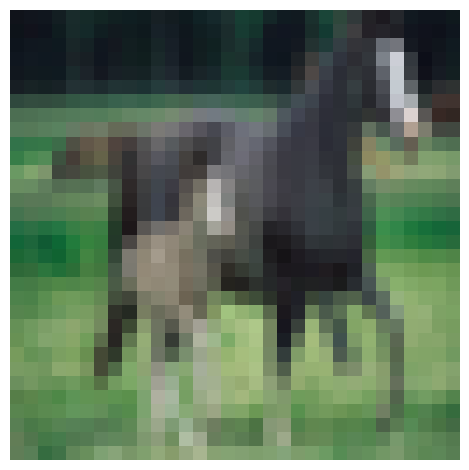

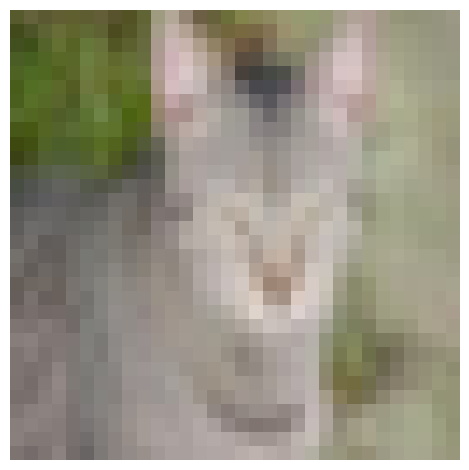

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])
dataset_train = CIFAR10(root='./data', train=True,download=True, transform=transform)
color_test =  CIFAR10(root='./data', train=False,download=True, transform=transform)
color_train, color_val = random_split(dataset_train, [45000, 5000])
#mnist_test = MNIST('', train=False, download=True, transform=transforms.ToTensor())

index = 320
sample = dataset_train[index] 
image, target = sample
image, target = sample[0], sample[1]
print('target :', target)
print('target type :', type(target))
print('image type :', type(image))
print('image shape :', image.shape)
show(image) 
sample = color_test[index] 
image, target = sample
image, target = sample[0], sample[1]
print('target :', target)
print('target type :', type(target))
print('image type :', type(image))
print('image shape :', image.shape)
show(image) 

# TODO : Do all the things related to DATA here
train_loader = DataLoader(color_train, batch_size=128, drop_last = True)
val_loader = DataLoader(color_val, batch_size=128, drop_last = True)
test_loader = DataLoader(color_test, batch_size=128, drop_last = True)

In [ ]:
# TODO : Do all the things related to MLP MODELs here

class AutoEncoder_MLP_COLOR(nn.Module):
  def __init__(self, input_size, compressed_space_size):
    """
    The model is an Input Layer, a Hidden Layer and an Output layer 
    """
    super().__init__() 
    self.input_size = input_size
    self.output_size = input_size
    self.compressed_space_size = compressed_space_size
    self.input = nn.Sequential(nn.Linear(self.input_size, self.compressed_space_size),
                               nn.Sigmoid()) 
    self.output = nn.Sequential(nn.Linear(self.compressed_space_size, self.output_size),
                               nn.Sigmoid()) 

  def forward(self,x):         
    """
    The input x is forwarded through the neural net. 
    """
    compressed_image = self.input(x)
    decompressed_image = self.output(compressed_image)
    return decompressed_image


In [ ]:
losses = 0
model = AutoEncoder_MLP_COLOR(32*32,512).to(device)
criterion = nn.MSELoss()
learning_rate = 0.0001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
num_epochs = 15

for epoch in range(num_epochs):
    running_loss_t, running_loss_v = 0.0, 0.0
    # Train Loop
    for i, data in enumerate(train_loader, 0):
        image, label = data[0], data[1]
        image, label = image.to(device), label.to(device)
        r, g, b = image[:, 0].unsqueeze(1), image[:, 1].unsqueeze(1), image[:, 2].unsqueeze(1)
        optimizer.zero_grad()
        outputs_r = model(r.view(-1, 32*32))
        outputs_g = model(g.view(-1, 32*32))
        outputs_b = model(b.view(-1, 32*32))
        outputs = torch.cat((outputs_r.view(-1, 1, 32, 32), outputs_g.view(-1, 1, 32, 32), outputs_b.view(-1, 1, 32, 32)), dim=1)
        loss = criterion(outputs, image)
        loss.backward()
        optimizer.step()
        running_loss_t += loss.item()
        if i == 50:
            running_loss_t = running_loss_t / 50
            print('Training loss is:', running_loss_t)

    # Validation Loop
    with torch.no_grad():
        for i, data in enumerate(val_loader, 0):
            image, label = data[0], data[1]
            image, label = image.to(device), label.to(device)
            r, g, b = image[:, 0].unsqueeze(1), image[:, 1].unsqueeze(1), image[:, 2].unsqueeze(1)
            outputs_r = model(r.view(-1, 32*32))
            outputs_g = model(g.view(-1, 32*32))
            outputs_b = model(b.view(-1, 32*32))
            outputs = torch.cat((outputs_r.view(-1, 1, 32, 32), outputs_g.view(-1, 1, 32, 32), outputs_b.view(-1, 1, 32, 32)), dim=1)
            loss = criterion(outputs, image)
            running_loss_v += loss.item()
            if i == 50:
                running_loss_v = running_loss_v / 50
                print('validation loss is :', running_loss_v)
                loss_val.append(running_loss_v)


Training loss is: 0.0627548035979271
Training loss is: 0.031746908500790594
Training loss is: 0.02370606493204832
Training loss is: 0.019962778203189372
Training loss is: 0.01761887226253748
Training loss is: 0.01594739519059658
Training loss is: 0.014754897896200419
Training loss is: 0.013787247966974973
Training loss is: 0.01295745074748993
Training loss is: 0.012248019259423017
Training loss is: 0.011646983586251736
Training loss is: 0.011132231820374728
Training loss is: 0.010678858999162912
Training loss is: 0.010270230639725923
Training loss is: 0.009898132719099522


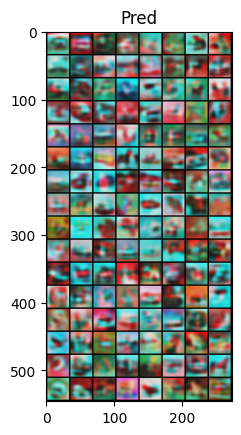

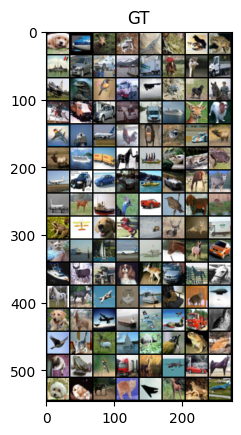

In [ ]:
# TODO : Do all the things related to TESTING here

with torch.no_grad():
  running_loss = []
  for i, data in enumerate(test_loader, 0):
    image, label = data[0], data[1]
    image, label = image.to(device), label.to(device)
    r, g, b = image[:, 0].unsqueeze(1), image[:, 1].unsqueeze(1), image[:, 2].unsqueeze(1)
    utputs_r = model(r.view(-1, 32*32))
    outputs_g = model(g.view(-1, 32*32))
    outputs_b = model(b.view(-1, 32*32))
    outputs = torch.cat((outputs_r.view(-1, 1, 32, 32), outputs_g.view(-1, 1, 32, 32), outputs_b.view(-1, 1, 32, 32)), dim=1)
    loss = criterion(outputs, image)
    running_loss_v += loss.item() 
    

imshow(torchvision.utils.make_grid(outputs.detach().cpu()), 'Pred')
imshow(torchvision.utils.make_grid(data[0]), 'GT')

Don't forget to write your results and explanation in your report

In [ ]:
# MLP Model Couleur 2 
class AutoEncoder_MLP_COLOR(nn.Module):
  def __init__(self, input_size, compressed_space_size):
    """
    The model is an Input Layer, a Hidden Layer and an Output layer 
    """
    super().__init__() 
    self.input_size = input_size
    self.output_size = input_size
    self.compressed_space_size = compressed_space_size
    self.input = nn.Sequential(nn.Linear(self.input_size, self.compressed_space_size),
                                nn.Linear(self.compressed_space_size, self.compressed_space_size),
                                nn.Linear(self.compressed_space_size, self.compressed_space_size),
                                nn.Linear(self.compressed_space_size, self.compressed_space_size),
                               nn.Sigmoid() ) 
    self.output = nn.Sequential(nn.Linear(self.compressed_space_size, self.compressed_space_size),
                                nn.Linear(self.compressed_space_size, self.compressed_space_size),
                                nn.Linear(self.compressed_space_size, self.compressed_space_size),
                                nn.Linear(self.compressed_space_size, self.output_size),
                               nn.Sigmoid()) 

  def forward(self,x):         
    """
    The input x is forwarded through the neural net. 
    """
    compressed_image = self.input(x)
    decompressed_image = self.output(compressed_image)
    return decompressed_image




Training loss is: 0.05769627213478088
Training loss is: 0.03015877090394497
Training loss is: 0.029230072796344757
Training loss is: 0.02638802886009216
Training loss is: 0.0239208821952343
Training loss is: 0.02194353476166725
Training loss is: 0.02110247205942869
Training loss is: 0.02026599407196045
Training loss is: 0.01939293384552002
Training loss is: 0.019056190624833106
Training loss is: 0.018406239375472068
Training loss is: 0.01744169058278203
Training loss is: 0.017002465203404427
Training loss is: 0.016322321686893702
Training loss is: 0.016005151476711034


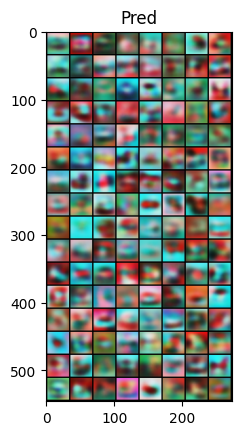

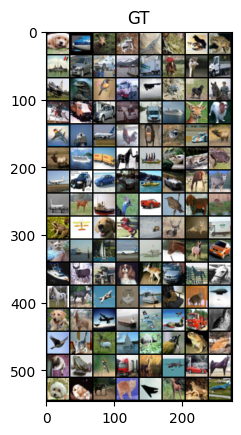

In [ ]:
losses = 0
modelR = AutoEncoder_MLP_COLOR(32*32,512).to(device)
modelG = AutoEncoder_MLP_COLOR(32*32,512).to(device)
modelB = AutoEncoder_MLP_COLOR(32*32,512).to(device)
criterion = nn.MSELoss()
learning_rate = 0.0001
optimizerR = torch.optim.Adam(modelR.parameters(), lr=learning_rate)
optimizerG = torch.optim.Adam(modelG.parameters(), lr=learning_rate)
optimizerB = torch.optim.Adam(modelB.parameters(), lr=learning_rate)
num_epochs = 15

for epoch in range(num_epochs):
    running_loss_t, running_loss_v = 0.0, 0.0
    # Train Loop
    for i, data in enumerate(train_loader, 0):
        image, label = data[0], data[1]
        image, label = image.to(device), label.to(device)
        r, g, b = image[:, 0].unsqueeze(1), image[:, 1].unsqueeze(1), image[:, 2].unsqueeze(1)
        optimizerR.zero_grad()
        optimizerG.zero_grad()
        optimizerB.zero_grad()
        outputs_r = modelR(r.view(-1, 32*32))
        outputs_g = modelG(g.view(-1, 32*32))
        outputs_b = modelB(b.view(-1, 32*32))
        outputs = torch.cat((outputs_r.view(-1, 1, 32, 32), outputs_g.view(-1, 1, 32, 32), outputs_b.view(-1, 1, 32, 32)), dim=1)
        loss = criterion(outputs, image)
        loss.backward()
        optimizerR.step()
        optimizerG.step()
        optimizerB.step()
        running_loss_t += loss.item()
        if i == 50:
            running_loss_t = running_loss_t / 50
            print('Training loss is:', running_loss_t)

    # Validation Loop
    with torch.no_grad():
        for i, data in enumerate(val_loader, 0):
            image, label = data[0], data[1]
            image, label = image.to(device), label.to(device)
            r, g, b = image[:, 0].unsqueeze(1), image[:, 1].unsqueeze(1), image[:, 2].unsqueeze(1)
            outputs_r = modelR(r.view(-1, 32*32))
            outputs_g = modelG(g.view(-1, 32*32))
            outputs_b = modelB(b.view(-1, 32*32))
            outputs = torch.cat((outputs_r.view(-1, 1, 32, 32), outputs_g.view(-1, 1, 32, 32), outputs_b.view(-1, 1, 32, 32)), dim=1)
            loss = criterion(outputs, image)
            running_loss_v += loss.item()
            if i == 50:
                running_loss_v = running_loss_v / 50
                print('validation loss is :', running_loss_v)
                loss_val.append(running_loss_v)

with torch.no_grad():
  running_loss = []
  for i, data in enumerate(test_loader, 0):
    image, label = data[0], data[1]
    image, label = image.to(device), label.to(device)
    r, g, b = image[:, 0].unsqueeze(1), image[:, 1].unsqueeze(1), image[:, 2].unsqueeze(1)
    utputs_r = modelR(r.view(-1, 32*32))
    outputs_g = modelG(g.view(-1, 32*32))
    outputs_b = modelB(b.view(-1, 32*32))
    outputs = torch.cat((outputs_r.view(-1, 1, 32, 32), outputs_g.view(-1, 1, 32, 32), outputs_b.view(-1, 1, 32, 32)), dim=1)
    loss = criterion(outputs, image)
    running_loss_v += loss.item() 
    

imshow(torchvision.utils.make_grid(outputs.detach().cpu()), 'Pred')
imshow(torchvision.utils.make_grid(data[0]), 'GT')

In [ ]:
# TODO : Do all the things related to Conv MODELs here

class ConvDown(nn.Module):
    """
    This class takes as input the channels and returns a feature map 
    for the given output channel. 
    It indeed applies ReLU to it
    ConvDown stacks a Conv2d layer with an ReLU Activation 

    """
    def __init__(self, input_channel, output_channel, kernel_size = 3):
        super().__init__()
        self.input_channel = input_channel
        self.output_channel = output_channel
        self.kernel_size = kernel_size
        self.model = nn.Sequential(nn.Conv2d(self.input_channel, self.output_channel, kernel_size =self.kernel_size ),
                                    nn.ReLU())
                                    
    def forward(self,x):
        # TODO :  Send the data through the model and return the output
        outputt = self.model(x)
        return outputt

class ConvUp(nn.Module):
    """
    ConvUp stacks a Conv2d layer with an Activation 
    If output is True : the Activation is Sigmoid
    If output is False : the Activation is ReLU
    """
    def __init__(self, input_channel, output_channel, kernel_size = 3 , output = True):
        super().__init__()
        self.input_channel = input_channel
        self.output_channel = output_channel
        self.kernel_size = kernel_size
        self.output = output
        self.model = nn.Sequential(nn.ConvTranspose2d(self.input_channel, self.output_channel, kernel_size =self.kernel_size ),
                                    nn.ReLU()) if output is False else nn.Sequential(nn.ConvTranspose2d(self.input_channel, self.output_channel, kernel_size =self.kernel_size ),
                                    nn.Sigmoid())
        
    def forward(self,x):        
      # TODO :  Send the data through the model and return the output
      outputt = self.model(x)
      return outputt


class Encoder(nn.Module):
    """
    The encoder stacks multiple ConvDown to compress and extract features
    For the moment, we just keep one ConvDown layer

    """
    def __init__(self,input_channel, output_channel, kernel_size = 3):
        super().__init__()
        self.input_channel = input_channel
        self.output_channel = output_channel
        self.kernel_size = kernel_size
        self.model = nn.Sequential( ConvDown(self.input_channel, self.output_channel,self.kernel_size))
                    
    def forward(self,x):
      # TODO :  Send the data through the model and return the output
      outputt = self.model(x)
      return outputt


# TODO : Find the error in the initialization and correct it
class Decoder(nn.Module):
    """
    The Decoder stacks multiple ConvUp to upsample and reconstruct from the input
    another feature map
    For the moment, we just keep one ConvDown layer
    NEEDS TO BE CORRECTED

    """
    def __init__(self,input_channel, output_channel, kernel_size = 3, output = True):
        super().__init__()
        self.input_channel = input_channel
        self.output_channel = output_channel
        self.kernel_size = kernel_size
        self.output = output
        self.model = nn.Sequential( ConvUp(self.input_channel,self.output_channel,self.kernel_size, output))
        
    def forward(self,x):
        # TODO :  Send the data through the model and return the output
        outputt = self.model(x)
        return outputt

class AutoEncoder_Conv(nn.Module):
    def __init__(self,input_size,latent_size, output= True):
        super().__init__()
        self.input_size = input_size
        self.latent_size = latent_size
        self.output = output
        self.model_encoder = nn.Sequential(Encoder(self.input_size, self.latent_size, kernel_size=3))
        self.model_decoder = nn.Sequential(Decoder(self.latent_size, self.input_size, kernel_size=3, output=self.output))

    def forward(self,x):
        outputt = self.model_decoder(self.model_encoder(x))
        return  outputt


In [ ]:
# TODO : Do all the things related to TRAINING here

model = AutoEncoder_Conv(input_size=3, latent_size=128, output=True)

losses = 0
net = model.to(device)
criterion = nn.MSELoss()
learning_rate = 0.0001
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
num_epochs = 15

for epoch in range(num_epochs) : 
    running_loss_t,running_loss_v = 0.0, 0.0
    # Train Loop
    for i, data in enumerate(train_loader, 0):
      image, label = data[0].to(device), data[1]
      optimizer.zero_grad()
      outputs = net(image).to(device)
      loss = criterion(outputs, image)
      loss.backward()
      optimizer.step()
      running_loss_t += loss.item()
      if i == 50 :
        running_loss_t = running_loss_t/50
        print('training loss is : ', running_loss_t)

    # Validation Loop
    with torch.no_grad():
      for i, data in enumerate(val_loader, 0):
        image, label = data[0].to(device), data[1]
        outputs = net(image).to(device)
        loss = criterion( outputs, image.to(device))
        running_loss_v += loss.item()
        if i == 50 :
          running_loss_v = running_loss_v/50
          print('validation loss is : ', running_loss_v)
          loss_val.append(running_loss_v)


training loss is :  0.07695121705532074
training loss is :  0.009169320818036794
training loss is :  0.005430630967020988
training loss is :  0.0048317407257854935
training loss is :  0.004449375085532665
training loss is :  0.004155236654914915
training loss is :  0.003912477632984519
training loss is :  0.003700539777055383
training loss is :  0.003519617128185928
training loss is :  0.003368122037500143
training loss is :  0.0032398999016731976
training loss is :  0.0031284801941365
training loss is :  0.0030218026926741005
training loss is :  0.0029234936321154235
training loss is :  0.002847444862127304


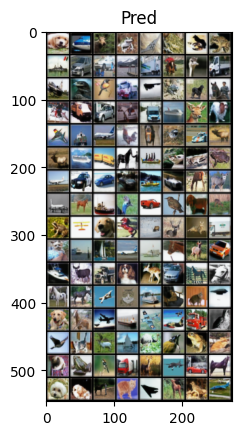

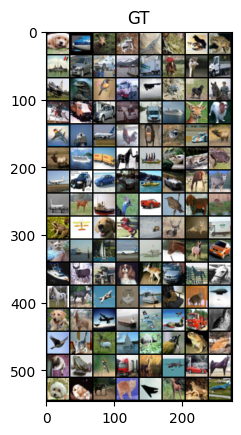

The difference between the Real Images and the Decompressed Images is:  0.21324106445536017


In [ ]:
# TODO : Do all the things related to TESTING here

# Testing Loop
with torch.no_grad():
  running_loss = []
  for i, data in enumerate(test_loader, 0):  
    image, label = data[0].to(device), data[1]
    outputs = net(image).to(device)
    loss = criterion(outputs, image.to(device))
    losses += loss.item()

# TODO :  Plot the last batch and the Reconstruction Errors
imshow(torchvision.utils.make_grid(outputs.detach().cpu()), 'Pred')
imshow(torchvision.utils.make_grid(data[0]), 'GT')

print('The difference between the Real Images and the Decompressed Images is: ', losses)

Don't forget to write your results and explanation in your report

# 8 - Results

Now analyze your results on the coloured Dataset.
* Is it much harder than the B&W Dataset ?
* Is the model efficient ?



* Sum up all your understanding on this subject your report.

You should explain:
* The dataset you used for training,
* The tests you did,
* The models you tested,
* The results you had,
* The explanation of the results (why it works, why it doesn't),
* How can we compute the compression rate of the model? 
* Do we need to consider the model's size?